In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import os
os.environ['PATH_TO_ENV'] = "~/projects/chatsky-llm-autoconfig/.env"

In [26]:
from dialogue2graph.datasets.complex_dialogues.generation import LoopedGraphGenerator

In [27]:
from dialogue2graph.pipelines.core.graph import Graph
from dialogue2graph.pipelines.core.dialogue_sampling import RecursiveDialogueSampler
from dialogue2graph.datasets.complex_dialogues.prompts import graph_example

In [28]:
sampler = RecursiveDialogueSampler()

In [29]:
dias = sampler.invoke(Graph(graph_example),5)

ENDS:  [9]
NODES:  [[1, 2, 5, 10, 11, 6, 7, 9], [1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9], [1, 5, 7, 9]]
REM:  [[1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9]]
Graph has all the dialogues


In [30]:
from settings import EnvSettings
env_settings = EnvSettings()

In [31]:
from langchain.chat_models import ChatOpenAI

In [32]:
generation_model = ChatOpenAI(model="chatgpt-4o-latest", api_key=env_settings.OPENAI_API_KEY, base_url=env_settings.OPENAI_BASE_URL, temperature=1)
validation_model = ChatOpenAI(model="gpt-3.5-turbo", api_key=env_settings.OPENAI_API_KEY, base_url=env_settings.OPENAI_BASE_URL)

/tmp/ipykernel_3723042/2894222870.py:1: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  generation_model = ChatOpenAI(model="chatgpt-4o-latest", api_key=env_settings.OPENAI_API_KEY, base_url=env_settings.OPENAI_BASE_URL, temperature=1)


In [9]:
generator = LoopedGraphGenerator(generation_model,validation_model)

In [10]:
graph = generator.invoke("booking a table")

INFO:dialogue2graph.datasets.complex_dialogues.generation:Generating Graph ...
INFO:dialogue2graph.utils.prompt_caching:Generated UUID: 00000000-0000-0000-0000-00000000002a



Generating graph for topic: booking a table


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:dialogue2graph.datasets.complex_dialogues.generation:Graph generated is {'edges': [{'source': 1, 'target': 2, 'utterances': ["I'd like to book a table for dinner.", 'Can you help me book a restaurant tonight?']}, {'source': 2, 'target': 3, 'utterances': ['This Saturday at 7 PM.', 'Tomorrow at 8 PM, please.']}, {'source': 3, 'target': 4, 'utterances': ['There will be 4 of us.', 'Just for 2 people.']}, {'source': 4, 'target': 5, 'utterances': ['Italian cuisine would be great!', 'A place near downtown would be perfect.']}, {'source': 5, 'target': 6, 'utterances': ['Yes, please book it!', 'That sounds great, go ahead and book it.']}, {'source': 6, 'target': 8, 'utterances': ["No, that's all. Thanks!", 'Nope, that’s all I needed.']}, {'source': 5, 'target': 7, 'utterances': ['Actually, can you give me the details first?', 'Can I get the address and contact info before boo

ENDS:  [8]
NODES:  [[1, 2, 3, 4, 5, 7, 5, 6, 8], [1, 2, 3, 4, 5, 6, 8], [1, 2, 3, 4, 2, 8], [1, 2, 8]]
REM:  [[1, 2, 3, 4, 5, 7, 5, 6, 8], [1, 2, 3, 4, 2, 8]]


INFO:dialogue2graph.datasets.complex_dialogues.generation:Sampled 49 dialogues


Graph has all the dialogues
Graph has all the dialogues


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:dialogue2graph.datasets.complex_dialogues.generation:Validating and fixing transitions...
INFO:dialogue2graph.datasets.complex_dialogues.generation:Validating initial graph
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx

In [22]:
graph[0]['graph']

{'edges': [{'source': 1,
   'target': 2,
   'utterances': ["I'd like to book a table for dinner.",
    'Can you help me find a place to eat?']},
  {'source': 2,
   'target': 3,
   'utterances': ["I'm looking for an Italian restaurant in downtown.",
    'I want a sushi place near the river.']},
  {'source': 3,
   'target': 4,
   'utterances': ["It'll be for four people at 7 PM.",
    'Table for two at 8:30, please.']},
  {'source': 4,
   'target': 5,
   'utterances': ['Yes, please book it.', 'Go ahead and confirm, thanks.']},
  {'source': 5,
   'target': 9,
   'utterances': ['No, that’s all. Thanks!', 'All good, appreciate it!']},
  {'source': 3,
   'target': 7,
   'utterances': ['Do they have anything a bit later?',
    'What if I come at 9 instead?']},
  {'source': 7,
   'target': 4,
   'utterances': ["Let's do the later time.", "I'll take the alternative."]},
  {'source': 4,
   'target': 6,
   'utterances': ['Actually, I need to change the time.',
    'Wait, can I adjust the party si

In [18]:
graph[0]['dialogues'][0]

{'messages': [{'text': 'Hey there! How can I help you today?',
   'participant': 'assistant'},
  {'text': "I'd like to book a table for dinner.", 'participant': 'user'},
  {'text': 'Sure! What kind of restaurant are you looking for? Any specific cuisine or location in mind?',
   'participant': 'assistant'},
  {'text': "I'm looking for an Italian restaurant in downtown.",
   'participant': 'user'},
  {'text': 'Got it. How many people will it be, and what time are you thinking?',
   'participant': 'assistant'},
  {'text': 'Do they have anything a bit later?', 'participant': 'user'},
  {'text': "That time isn't available. I can book you in an hour later, or I can check for another place. What do you prefer?",
   'participant': 'assistant'},
  {'text': "Let's do the later time.", 'participant': 'user'},
  {'text': 'Looks like they have a table available at that time. Want me to book it for you?',
   'participant': 'assistant'},
  {'text': 'Actually, I need to change the time.', 'participan

In [19]:
graph_c = Graph(graph[0]['graph'])

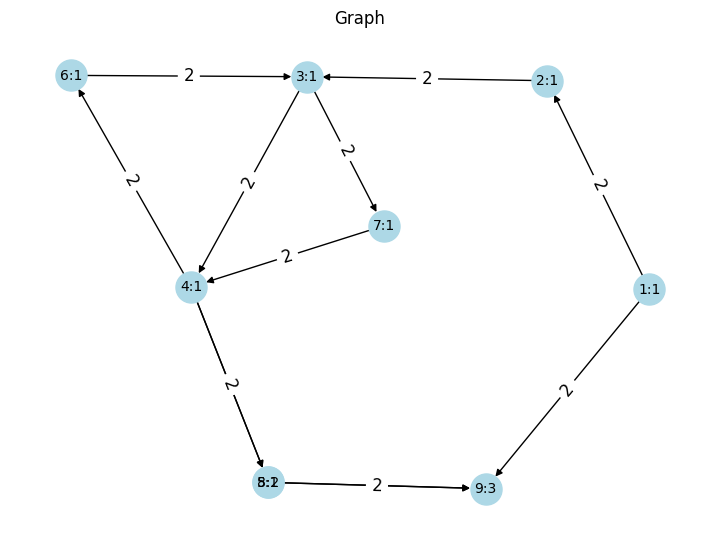

In [20]:
graph_c.visualise_short("Graph")

In [33]:
graph_c = {'edges': [{'source': 1,
   'target': 2,
   'utterances': ["I'd like to book a table for dinner.",
    'Can you help me find a place to eat?']},
  {'source': 2,
   'target': 3,
   'utterances': ["I'm looking for an Italian restaurant in downtown.",
    'I want a sushi place near the river.']},
  {'source': 3,
   'target': 4,
   'utterances': ["It'll be for four people at 7 PM.",
    'Table for two at 8:30, please.']},
  {'source': 4,
   'target': 5,
   'utterances': ['Yes, please book it.', 'Go ahead and confirm, thanks.']},
  {'source': 5,
   'target': 9,
   'utterances': ['No, that’s all. Thanks!', 'All good, appreciate it!']},
  {'source': 3,
   'target': 7,
   'utterances': ['Do they have anything a bit later?',
    'What if I come at 9 instead?']},
  {'source': 7,
   'target': 4,
   'utterances': ["Let's do the later time.", "I'll take the alternative."]},
  {'source': 4,
   'target': 6,
   'utterances': ['Actually, I need to change the time.',
    'Wait, can I adjust the party size?']},
  {'source': 6,
   'target': 3,
   'utterances': ["Let's make it five people instead.",
    'Can we do 6:30 instead of 7?']},
  {'source': 4,
   'target': 8,
   'utterances': ["Can you give me the restaurant's address?",
    'I’d like their phone number too, please.']},
  {'source': 8,
   'target': 9,
   'utterances': ["No, that's all I needed. Thanks!",
    'Great, thanks for your help!']},
  {'source': 1,
   'target': 9,
   'utterances': ['Nevermind, I changed my mind.',
    "Actually, I don't need a reservation after all."]}],
 'nodes': [{'id': 1,
   'label': 'start',
   'is_start': True,
   'utterances': ['Hey there! How can I help you today?']},
  {'id': 2,
   'label': 'ask_restaurant_preference',
   'is_start': False,
   'utterances': ['Sure! What kind of restaurant are you looking for? Any specific cuisine or location in mind?']},
  {'id': 3,
   'label': 'ask_party_size_time',
   'is_start': False,
   'utterances': ['Got it. How many people will it be, and what time are you thinking?']},
  {'id': 4,
   'label': 'confirm_availability',
   'is_start': False,
   'utterances': ['Looks like they have a table available at that time. Want me to book it for you?']},
  {'id': 5,
   'label': 'confirm_booking',
   'is_start': False,
   'utterances': ["You're all set! Your reservation is confirmed. Anything else I can help with?"]},
  {'id': 6,
   'label': 'ask_modification',
   'is_start': False,
   'utterances': ['No problem! What would you like to change about the reservation?']},
  {'id': 7,
   'label': 'offer_alternatives',
   'is_start': False,
   'utterances': ["That time isn't available. I can book you in an hour later, or I can check for another place. What do you prefer?"]},
  {'id': 8,
   'label': 'provide_contact_info',
   'is_start': False,
   'utterances': ["Here's the restaurant's info: 32 Main Street, 555-6789. Need anything else?",
    'Their address is 78 Oak Ave, and you can call them at 555-4321.']},
  {'id': 9,
   'label': 'closing',
   'is_start': False,
   'utterances': ['Alright, have a great meal!',
    'Thanks for reaching out. Have a great day!',
    "You're welcome! Enjoy your meal!"]}]}

In [20]:
dias = sampler.invoke(Graph(graph_c),5)

ENDS:  [9]
NODES:  [[1, 2, 3, 4, 6, 3, 7, 4, 5, 9], [1, 2, 3, 4, 6, 3, 7, 4, 8, 9], [1, 2, 3, 7, 4, 6, 3, 4, 5, 9], [1, 2, 3, 7, 4, 6, 3, 4, 8, 9], [1, 2, 3, 7, 4, 5, 9], [1, 2, 3, 7, 4, 8, 9], [1, 2, 3, 4, 5, 9], [1, 2, 3, 4, 8, 9], [1, 9]]
REM:  [[1, 2, 3, 7, 4, 6, 3, 4, 8, 9], [1, 2, 3, 4, 5, 9], [1, 9]]
Graph has all the dialogues


In [19]:
dias

[Dialogue(messages=[DialogueMessage(text='Hey there! How can I help you today?', participant='assistant'), DialogueMessage(text="I'd like to book a table for dinner.", participant='user'), DialogueMessage(text='Sure! What kind of restaurant are you looking for? Any specific cuisine or location in mind?', participant='assistant'), DialogueMessage(text="I'm looking for an Italian restaurant in downtown.", participant='user'), DialogueMessage(text='Got it. How many people will it be, and what time are you thinking?', participant='assistant'), DialogueMessage(text='Do they have anything a bit later?', participant='user'), DialogueMessage(text="That time isn't available. I can book you in an hour later, or I can check for another place. What do you prefer?", participant='assistant'), DialogueMessage(text="Let's do the later time.", participant='user'), DialogueMessage(text='Looks like they have a table available at that time. Want me to book it for you?', participant='assistant'), DialogueM

In [10]:
from three_stages_0 import ThreeStagesGraphGenerator

In [19]:
generator = ThreeStagesGraphGenerator()

In [20]:
res_graph = generator.invoke(dias)

LLM


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


NODES:  {'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! How can I help you?']}, {'id': 2, 'label': 'recommend_restaurant', 'is_start': False, 'utterances': ['Try curry prince or pizza hut fen ditton', 'I was able to find three options in your price range, may I recommend The Gandhi?', 'There are a number of options for Indian restaurants in the centre of town. What price range would you like?', 'I found five expensive restaurants on the south side of town. Would you prefer Chinese, Indian, Italian or Mexican?', 'I have found many possibilities. Golden house is chinese and the river bar steakhouse and grill serves modern european. Are either of those of interest for you?']}, {'id': 3, 'label': 'confirm_italian_restaurant', 'is_start': False, 'utterances': ['Pizza hut fen ditton serves italian food in the east, would you like a reservation?']}, {'id': 4, 'label': 'no_other_italian_restaurants', 'is_start': False, 'utterances': ['Pizza hut fen ditton is the

In [17]:
graph_example

{'edges': [{'source': 1,
   'target': 2,
   'utterances': ["I'm looking for an Indian restaurant, preferably in the centre of town."]},
  {'source': 2,
   'target': 5,
   'utterances': ['I would prefer cheap restaurants.']},
  {'source': 5,
   'target': 7,
   'utterances': ['Sure please book a table there fore 7 people at 12:15 on saturday']},
  {'source': 1,
   'target': 5,
   'utterances': ['I am looking for a restaurant. The restaurant should be in the moderate price range and should be in the east']},
  {'source': 5,
   'target': 10,
   'utterances': ['The restaurant should serve italian food.']},
  {'source': 6,
   'target': 7,
   'utterances': ['I will have 5 people and we would like 12:15 if possible. Thanks.']},
  {'source': 7,
   'target': 9,
   'utterances': ["No that's all I needed. Thank you!",
    'Thanks for you help. I only need the restaurant reservation. Goodbye.']},
  {'source': 10,
   'target': 11,
   'utterances': ['What other restaurants in that area serve Italian 

In [21]:
res_graph.graph_dict

{'nodes': [{'id': 1,
   'label': 'start',
   'is_start': True,
   'utterances': ['Hello! How can I help you?']},
  {'id': 2,
   'label': 'recommend_restaurant',
   'is_start': False,
   'utterances': ['Try curry prince or pizza hut fen ditton',
    'I was able to find three options in your price range, may I recommend The Gandhi?',
    'There are a number of options for Indian restaurants in the centre of town. What price range would you like?',
    'I found five expensive restaurants on the south side of town. Would you prefer Chinese, Indian, Italian or Mexican?',
    'I have found many possibilities. Golden house is chinese and the river bar steakhouse and grill serves modern european. Are either of those of interest for you?']},
  {'id': 3,
   'label': 'confirm_italian_restaurant',
   'is_start': False,
   'utterances': ['Pizza hut fen ditton serves italian food in the east, would you like a reservation?']},
  {'id': 4,
   'label': 'no_other_italian_restaurants',
   'is_start': Fal

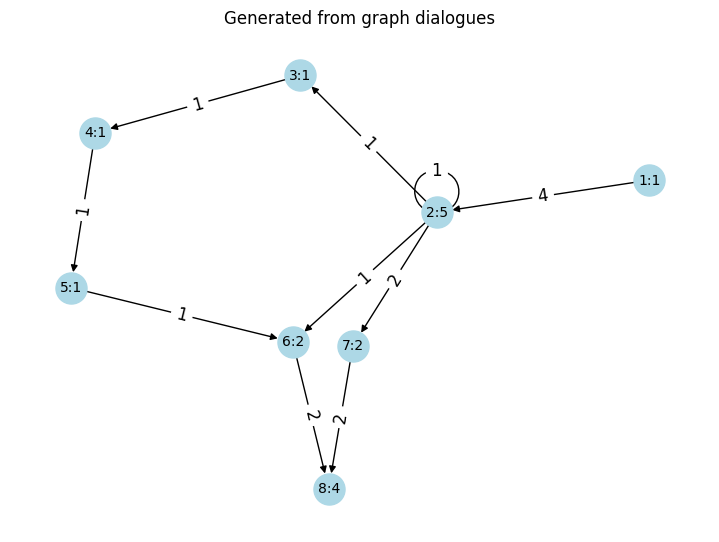

In [22]:
res_graph.visualise_short("Generated from graph dialogues")

In [34]:
from dialogue2graph.metrics.llm_metrics import compare_graphs

In [35]:
compare_graphs(Graph(graph_c),Graph(graph_example))

{'value': False, 'description': 'Numbers of nodes do not match: 9 != 11'}

In [23]:
compare_graphs(res_graph,Graph(graph_example))

{'value': False, 'description': 'Numbers of nodes do not match: 8 != 11'}

In [27]:
compare_graphs(res_graph,Graph(graph_c))

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

{'value': True,
 'description': 'Nodes similarity: 0.9999998807907104, Nodes+edges similarity: 0.9848463535308838'}

In [15]:
from dialogue2graph.metrics.no_llm_metrics import dg_triplets_match

In [21]:
dg_triplets_match(Graph(graph_c), dias)

Graph has all the dialogues


{'value': True}

In [17]:
dias = sampler.invoke(Graph(graph_example),5)

ENDS:  [9]
NODES:  [[1, 2, 5, 10, 11, 6, 7, 9], [1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9], [1, 5, 7, 9]]
REM:  [[1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9]]
Graph has all the dialogues


In [19]:
dg_triplets_match(Graph(graph_c), dias)

{'value': False,
 'description': 'Triplets missing in dialogues',
 'absent_triplets': [{'source': "here's the restaurant's info: 32 main street, 555-6789. need anything else?",
   'edge': "no, that's all i needed. thanks!",
   'target': 'alright, have a great meal!'},
  {'source': "here's the restaurant's info: 32 main street, 555-6789. need anything else?",
   'edge': "no, that's all i needed. thanks!",
   'target': 'thanks for reaching out. have a great day!'},
  {'source': 'no problem! what would you like to change about the reservation?',
   'edge': 'can we do 6:30 instead of 7?',
   'target': 'got it. how many people will it be, and what time are you thinking?'},
  {'source': 'hey there! how can i help you today?',
   'edge': 'nevermind, i changed my mind.',
   'target': 'thanks for reaching out. have a great day!'},
  {'source': 'hey there! how can i help you today?',
   'edge': 'nevermind, i changed my mind.',
   'target': 'alright, have a great meal!'},
  {'source': "you're all

In [22]:
from dialogue2graph.metrics.no_llm_metrics import dialogues_are_valid_paths

In [23]:
dialogues_are_valid_paths(Graph(graph_c), dias)

{'value': True}

In [24]:
dias = sampler.invoke(Graph(graph_example),5)

ENDS:  [9]
NODES:  [[1, 2, 5, 10, 11, 6, 7, 9], [1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9], [1, 5, 7, 9]]
REM:  [[1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9]]
Graph has all the dialogues


In [25]:
dialogues_are_valid_paths(Graph(graph_c), dias)

{'value': False,
 'invalid_transitions': [{'from_message': 'Hello! How can I help you?',
   'to_message': 'I am looking for a restaurant. The restaurant should be in the moderate price range and should be in the east',
   'dialogue_id': ''},
  {'from_message': 'I am looking for a restaurant. The restaurant should be in the moderate price range and should be in the east',
   'to_message': 'Try curry prince or pizza hut fen ditton',
   'dialogue_id': ''},
  {'from_message': 'Try curry prince or pizza hut fen ditton',
   'to_message': 'The restaurant should serve italian food.',
   'dialogue_id': ''},
  {'from_message': 'The restaurant should serve italian food.',
   'to_message': 'Pizza hut fen ditton serves italian food in the east, would you like a reservation?',
   'dialogue_id': ''},
  {'from_message': 'Pizza hut fen ditton serves italian food in the east, would you like a reservation?',
   'to_message': 'What other restaurants in that area serve Italian food?',
   'dialogue_id': ''}